# ASR Evaluation: Whisper vs Voxtral for Sonography Transcription

This notebook provides a comprehensive evaluation of two state-of-the-art ASR models for sonography audio transcription:

- **Whisper-Large-v3**: OpenAI's latest large-scale multilingual ASR model
- **Voxtral-Mini-3b**: A specialized model for medical/clinical audio transcription

## Dataset

We evaluate these models on a curated dataset of sonography audio recordings with manually verified transcriptions. The dataset includes various types of obstetric and gynecologic ultrasound examinations.

## Evaluation Metrics

We use multiple complementary metrics to provide a comprehensive evaluation:

1. **Word Error Rate (WER)**: Traditional ASR metric measuring word-level accuracy
2. **Character Error Rate (CER)**: Character-level accuracy, useful for medical terminology
3. **Semantic Similarity**: Cosine similarity of sentence embeddings to measure meaning preservation
4. **Medical Term Accuracy**: Domain-specific metric for clinical terminology recognition
5. **Case-Type Analysis**: Performance breakdown by examination type

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

print("Libraries imported successfully!")

Libraries imported successfully!


## Data Loading and Initial Analysis

First, let's load the evaluation results from our MetricSelectionVW.py script.

In [2]:
# Define paths to output files
output_dir = "./output"
summary_path = os.path.join(output_dir, "metrics_summary_whisper_voxtral.csv")
sample_path = os.path.join(output_dir, "sample_metrics_whisper_voxtral.csv")
medical_path = os.path.join(output_dir, "medical_term_accuracy_whisper_voxtral.csv")
case_path = os.path.join(output_dir, "case_type_metrics_whisper_voxtral.csv")

# Check if files exist
for path in [summary_path, sample_path, medical_path, case_path]:
    if os.path.exists(path):
        print(f"✓ Found: {path}")
    else:
        print(f"✗ Missing: {path}")
        print("Please run MetricSelectionVW.py first to generate the evaluation metrics.")

✓ Found: ./output/metrics_summary_whisper_voxtral.csv
✓ Found: ./output/sample_metrics_whisper_voxtral.csv
✓ Found: ./output/medical_term_accuracy_whisper_voxtral.csv
✓ Found: ./output/case_type_metrics_whisper_voxtral.csv


In [11]:
# Load the original dataset
original_data = pd.read_csv("Sonograpy-Gold-whipser-voxtral.csv")
print(f"Original dataset shape: {original_data.shape}")
print(f"Columns: {original_data.columns.tolist()}")

Original dataset shape: (17, 4)
Columns: ['Filename', 'Manual Transcription', 'Whisper-Large-v3', 'Voxtral-Mini-3b']


In [4]:
# Load evaluation metrics
if os.path.exists(summary_path):
    summary_df = pd.read_csv(summary_path)
    print("Metrics Summary:")
    display(summary_df)
else:
    print("Summary metrics file not found. Please run MetricSelectionVW.py first.")

Metrics Summary:


,Model,WER_Mean,WER_StdDev,CER_Mean,CER_StdDev,Cosine_Similarity_Mean,Cosine_Similarity_StdDev,Medical_Term_Accuracy
0,Whisper-Large-v3,0.667919,0.658857,0.384619,0.421385,0.842912,0.117022,0.814815
1,Voxtral-Mini-3b,0.548310,0.318670,0.311928,0.275819,0.797923,0.201411,0.834758


In [5]:
# Load per-sample metrics
if os.path.exists(sample_path):
    sample_df = pd.read_csv(sample_path)
    print(f"Per-sample metrics shape: {sample_df.shape}")
    print("\nSample metrics overview:")
    display(sample_df.head(10))
else:
    print("Sample metrics file not found. Please run MetricSelectionVW.py first.")

Per-sample metrics shape: (34, 5)

Sample metrics overview:


,Filename,Model,WER,CER,Cosine_Similarity
0,00000048-AUDIO-2024-11-27-08-10-48.mp3,Whisper-Large-v3,0.366197,0.130332,0.876432
1,00000056-AUDIO-2024-12-05-05-49-47.m4a,Whisper-Large-v3,0.035088,0.003003,0.974740
2,00000153-AUDIO-2024-12-16-07-23-44.m4a,Whisper-Large-v3,0.137255,0.035370,0.991992
3,00000161-AUDIO-2024-12-19-04-40-49.m4a,Whisper-Large-v3,0.378378,0.200000,0.859358
4,00000193-AUDIO-2024-12-19-04-41-13.m4a,Whisper-Large-v3,0.486111,0.216814,0.772267
5,00000284-AUDIO-2025-01-22-08-12-19.m4a,Whisper-Large-v3,0.088889,0.047297,0.899734
6,00000341-AUDIO-2025-01-30-07-25-48.mp3,Whisper-Large-v3,0.518519,0.397872,0.872658
7,00000368-AUDIO-2025-02-06-04-35-21.m4a,Whisper-Large-v3,0.478873,0.203704,0.813892
8,00000370-AUDIO-2025-02-06-04-35-22.m4a,Whisper-Large-v3,0.338710,0.178191,0.942296
9,00000430-AUDIO-2025-03-11-07-29-35.m4a,Whisper-Large-v3,0.228571,0.085526,0.976214


## Overall Performance Comparison

Let's create comprehensive visualizations comparing the two models across all metrics.

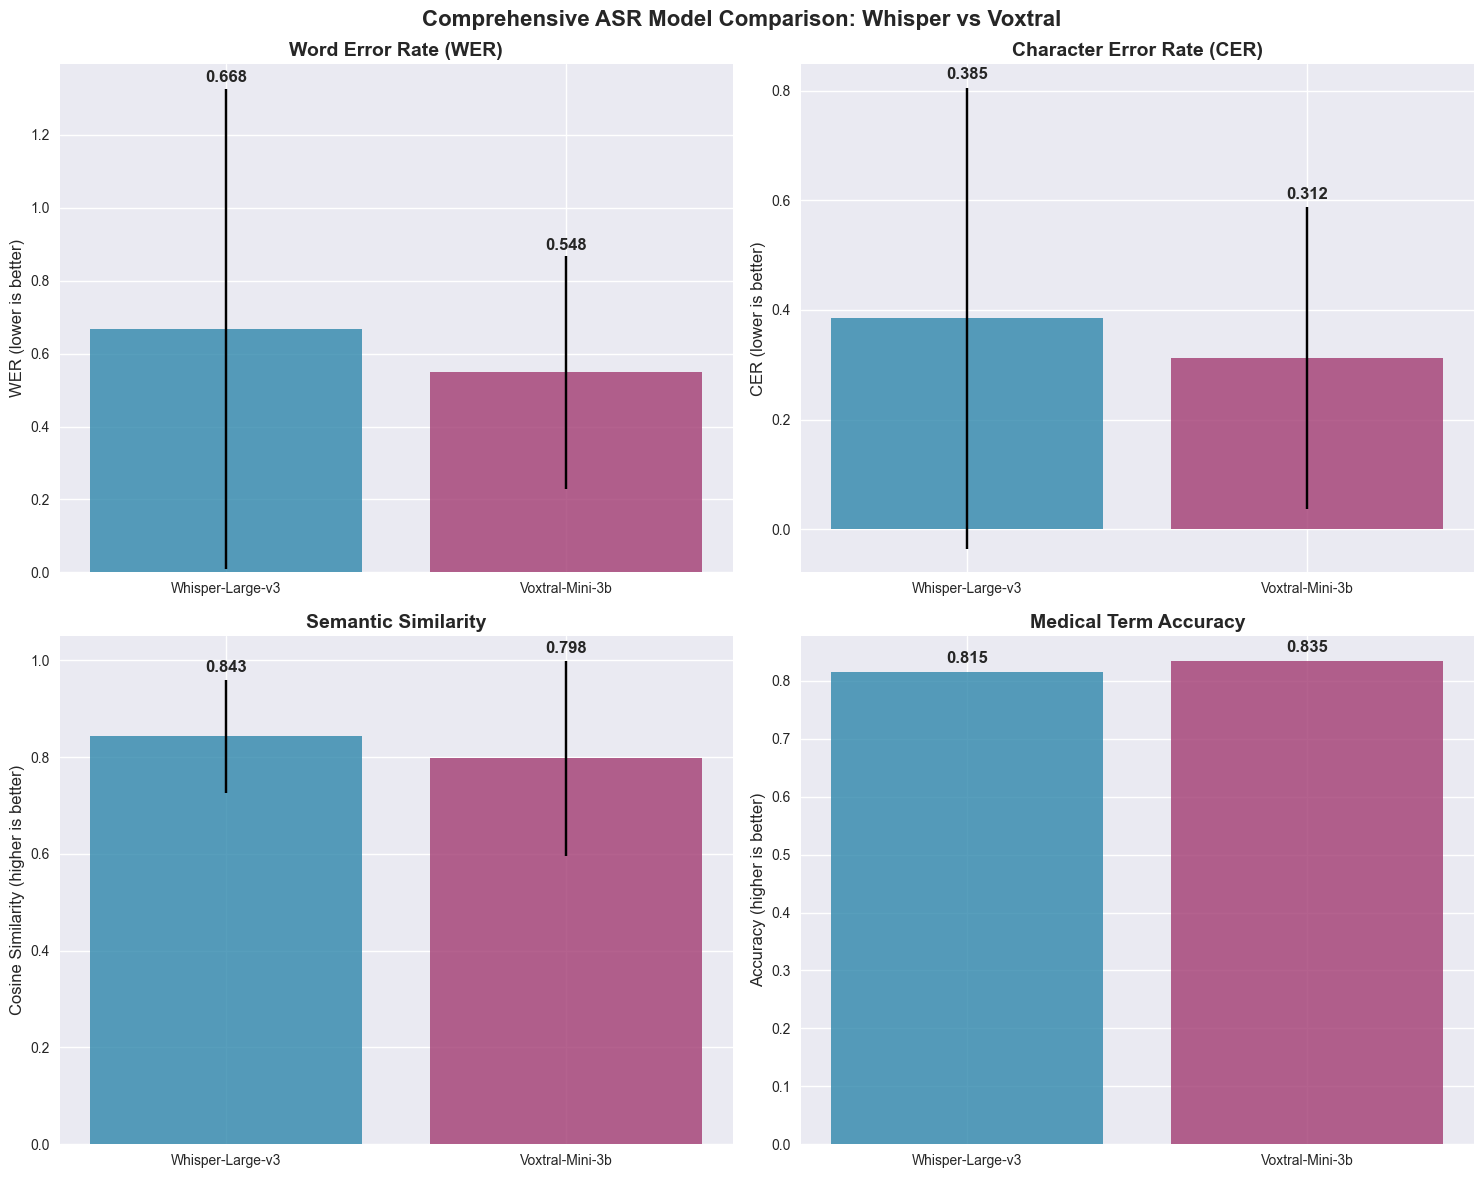

In [6]:
# Create a comprehensive comparison plot
if os.path.exists(summary_path):
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Comprehensive ASR Model Comparison: Whisper vs Voxtral', fontsize=16, fontweight='bold')
    
    # WER Comparison
    ax1 = axes[0, 0]
    models = summary_df['Model']
    wer_means = summary_df['WER_Mean']
    wer_stds = summary_df['WER_StdDev']
    
    bars1 = ax1.bar(models, wer_means, yerr=wer_stds, capsize=5, 
                    color=['#2E86AB', '#A23B72'], alpha=0.8)
    ax1.set_title('Word Error Rate (WER)', fontweight='bold')
    ax1.set_ylabel('WER (lower is better)')
    
    # Add value labels
    for bar, mean, std in zip(bars1, wer_means, wer_stds):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.01,
                f'{mean:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # CER Comparison
    ax2 = axes[0, 1]
    cer_means = summary_df['CER_Mean']
    cer_stds = summary_df['CER_StdDev']
    
    bars2 = ax2.bar(models, cer_means, yerr=cer_stds, capsize=5,
                    color=['#2E86AB', '#A23B72'], alpha=0.8)
    ax2.set_title('Character Error Rate (CER)', fontweight='bold')
    ax2.set_ylabel('CER (lower is better)')
    
    for bar, mean, std in zip(bars2, cer_means, cer_stds):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.01,
                f'{mean:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # Cosine Similarity Comparison
    ax3 = axes[1, 0]
    cosine_means = summary_df['Cosine_Similarity_Mean']
    cosine_stds = summary_df['Cosine_Similarity_StdDev']
    
    bars3 = ax3.bar(models, cosine_means, yerr=cosine_stds, capsize=5,
                    color=['#2E86AB', '#A23B72'], alpha=0.8)
    ax3.set_title('Semantic Similarity', fontweight='bold')
    ax3.set_ylabel('Cosine Similarity (higher is better)')
    
    for bar, mean, std in zip(bars3, cosine_means, cosine_stds):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.01,
                f'{mean:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # Medical Term Accuracy
    ax4 = axes[1, 1]
    medical_acc = summary_df['Medical_Term_Accuracy']
    
    bars4 = ax4.bar(models, medical_acc, color=['#2E86AB', '#A23B72'], alpha=0.8)
    ax4.set_title('Medical Term Accuracy', fontweight='bold')
    ax4.set_ylabel('Accuracy (higher is better)')
    
    for bar, acc in zip(bars4, medical_acc):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('./figures/comprehensive_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Summary data not available. Please run MetricSelectionVW.py first.")

## Per-Sample Analysis

Let's analyze the distribution of errors across individual samples to identify patterns and outliers.

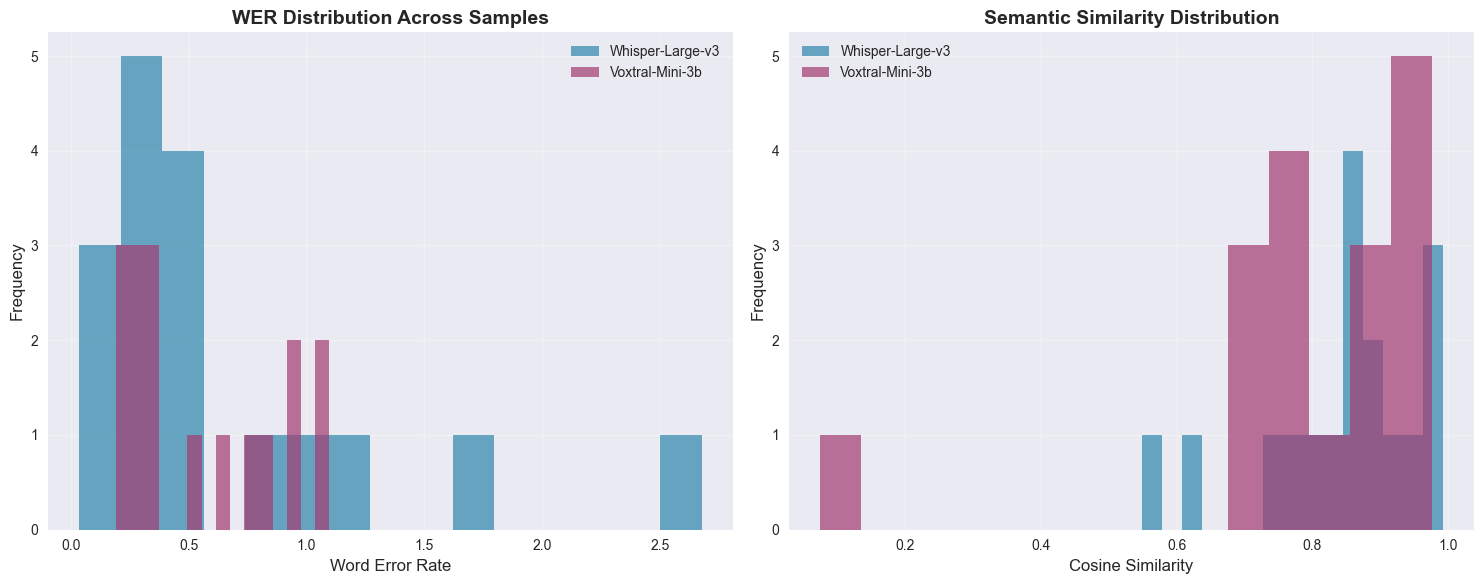

Statistical Analysis:
WER Comparison (Mann-Whitney U test):
  Whisper mean: 0.6679 ± 0.6791
  Voxtral mean: 0.5483 ± 0.3285
  p-value: 0.836274
  Significant difference: No

Cosine Similarity Comparison (Mann-Whitney U test):
  Whisper mean: 0.8429 ± 0.1206
  Voxtral mean: 0.7979 ± 0.2076
  p-value: 0.535269
  Significant difference: No


In [7]:
# Per-sample WER distribution
if os.path.exists(sample_path):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # WER Distribution
    whisper_wer = sample_df[sample_df['Model'] == 'Whisper-Large-v3']['WER']
    voxtral_wer = sample_df[sample_df['Model'] == 'Voxtral-Mini-3b']['WER']
    
    axes[0].hist(whisper_wer, alpha=0.7, label='Whisper-Large-v3', bins=15, color='#2E86AB')
    axes[0].hist(voxtral_wer, alpha=0.7, label='Voxtral-Mini-3b', bins=15, color='#A23B72')
    axes[0].set_title('WER Distribution Across Samples', fontweight='bold')
    axes[0].set_xlabel('Word Error Rate')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Cosine Similarity Distribution
    whisper_cosine = sample_df[sample_df['Model'] == 'Whisper-Large-v3']['Cosine_Similarity']
    voxtral_cosine = sample_df[sample_df['Model'] == 'Voxtral-Mini-3b']['Cosine_Similarity']
    
    axes[1].hist(whisper_cosine, alpha=0.7, label='Whisper-Large-v3', bins=15, color='#2E86AB')
    axes[1].hist(voxtral_cosine, alpha=0.7, label='Voxtral-Mini-3b', bins=15, color='#A23B72')
    axes[1].set_title('Semantic Similarity Distribution', fontweight='bold')
    axes[1].set_xlabel('Cosine Similarity')
    axes[1].set_ylabel('Frequency')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('./figures/distribution_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Statistical test
    print("Statistical Analysis:")
    print("=" * 50)
    
    # WER comparison
    wer_stat, wer_pval = stats.mannwhitneyu(whisper_wer, voxtral_wer, alternative='two-sided')
    print(f"WER Comparison (Mann-Whitney U test):")
    print(f"  Whisper mean: {whisper_wer.mean():.4f} ± {whisper_wer.std():.4f}")
    print(f"  Voxtral mean: {voxtral_wer.mean():.4f} ± {voxtral_wer.std():.4f}")
    print(f"  p-value: {wer_pval:.6f}")
    print(f"  Significant difference: {'Yes' if wer_pval < 0.05 else 'No'}")
    
    # Cosine similarity comparison
    cosine_stat, cosine_pval = stats.mannwhitneyu(whisper_cosine, voxtral_cosine, alternative='two-sided')
    print(f"\nCosine Similarity Comparison (Mann-Whitney U test):")
    print(f"  Whisper mean: {whisper_cosine.mean():.4f} ± {whisper_cosine.std():.4f}")
    print(f"  Voxtral mean: {voxtral_cosine.mean():.4f} ± {voxtral_cosine.std():.4f}")
    print(f"  p-value: {cosine_pval:.6f}")
    print(f"  Significant difference: {'Yes' if cosine_pval < 0.05 else 'No'}")
else:
    print("Sample data not available. Please run MetricSelectionVW.py first.")

## Medical Term Analysis

Let's examine how well each model handles domain-specific medical terminology.

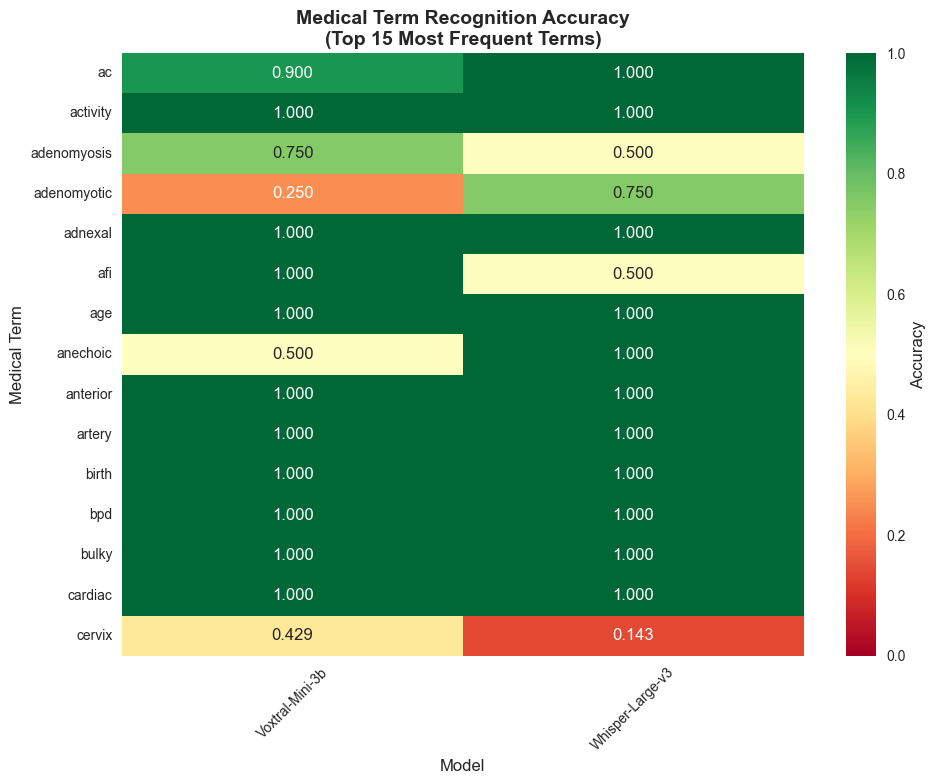

Terms with Significant Performance Differences (>10%):
adenomyotic          | Whisper: 0.750 | Voxtral: 0.250 | Better: Whisper
anechoic             | Whisper: 1.000 | Voxtral: 0.500 | Better: Whisper
afi                  | Whisper: 0.500 | Voxtral: 1.000 | Better: Voxtral
cervix               | Whisper: 0.143 | Voxtral: 0.429 | Better: Voxtral
adenomyosis          | Whisper: 0.500 | Voxtral: 0.750 | Better: Voxtral


In [8]:
# Medical term accuracy analysis
if os.path.exists(medical_path):
    medical_df = pd.read_csv(medical_path)
    
    # Get top terms by frequency
    term_counts = medical_df.groupby('Medical_Term').size().sort_values(ascending=False)
    top_terms = term_counts.head(15).index
    
    # Filter data for top terms
    top_medical_df = medical_df[medical_df['Medical_Term'].isin(top_terms)]
    
    # Create pivot table for visualization
    medical_pivot = top_medical_df.pivot(index='Medical_Term', columns='Model', values='Accuracy')
    
    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(medical_pivot, annot=True, fmt='.3f', cmap='RdYlGn', 
                cbar_kws={'label': 'Accuracy'}, vmin=0, vmax=1)
    plt.title('Medical Term Recognition Accuracy\n(Top 15 Most Frequent Terms)', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Model')
    plt.ylabel('Medical Term')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('./figures/medical_term_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Show terms where models differ significantly
    medical_pivot['Difference'] = abs(medical_pivot['Whisper-Large-v3'] - medical_pivot['Voxtral-Mini-3b'])
    significant_diff = medical_pivot[medical_pivot['Difference'] > 0.1].sort_values('Difference', ascending=False)
    
    print("Terms with Significant Performance Differences (>10%):")
    print("=" * 70)
    for term, row in significant_diff.iterrows():
        whisper_acc = row['Whisper-Large-v3']
        voxtral_acc = row['Voxtral-Mini-3b']
        better_model = 'Whisper' if whisper_acc > voxtral_acc else 'Voxtral'
        print(f"{term:20} | Whisper: {whisper_acc:.3f} | Voxtral: {voxtral_acc:.3f} | Better: {better_model}")
else:
    print("Medical term data not available. Please run MetricSelectionVW.py first.")

## Case-Type Specific Analysis

Let's analyze performance across different types of medical examinations.

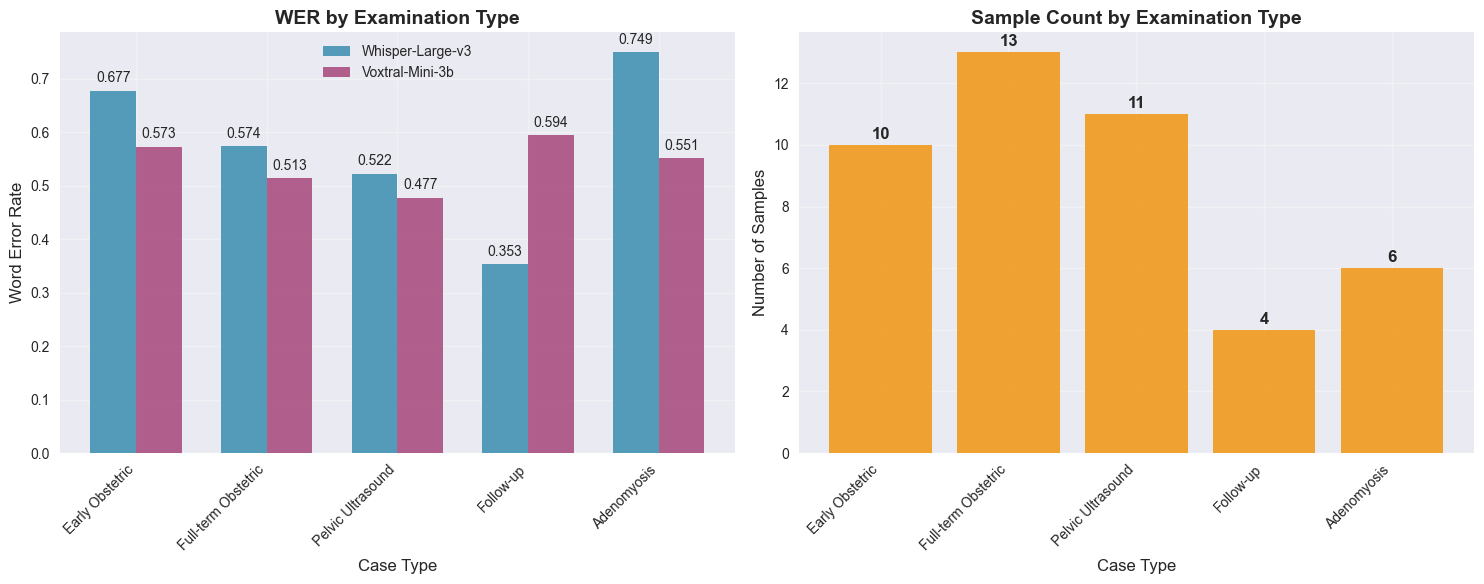

Case-Type Performance Summary:
Early Obstetric      (10 samples) | Whisper: 0.677 | Voxtral: 0.573 | Better: Voxtral
Full-term Obstetric  (13 samples) | Whisper: 0.574 | Voxtral: 0.513 | Better: Voxtral
Pelvic Ultrasound    (11 samples) | Whisper: 0.522 | Voxtral: 0.477 | Better: Voxtral
Follow-up            ( 4 samples) | Whisper: 0.353 | Voxtral: 0.594 | Better: Whisper
Adenomyosis          ( 6 samples) | Whisper: 0.749 | Voxtral: 0.551 | Better: Voxtral


In [9]:
# Case-type specific performance analysis
if os.path.exists(case_path):
    case_df = pd.read_csv(case_path)
    
    # Filter out cases with very few samples
    case_df_filtered = case_df[case_df['Sample_Count'] >= 2]
    
    # Create subplots for case-type analysis
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # WER by case type
    case_types = case_df_filtered['Case_Type'].unique()
    x = np.arange(len(case_types))
    width = 0.35
    
    whisper_wer_case = []
    voxtral_wer_case = []
    
    for case_type in case_types:
        whisper_row = case_df_filtered[(case_df_filtered['Case_Type'] == case_type) & 
                                      (case_df_filtered['Model'] == 'Whisper-Large-v3')]
        voxtral_row = case_df_filtered[(case_df_filtered['Case_Type'] == case_type) & 
                                      (case_df_filtered['Model'] == 'Voxtral-Mini-3b')]
        
        whisper_wer_case.append(whisper_row['WER_Mean'].iloc[0] if len(whisper_row) > 0 else 0)
        voxtral_wer_case.append(voxtral_row['WER_Mean'].iloc[0] if len(voxtral_row) > 0 else 0)
    
    bars1 = axes[0].bar(x - width/2, whisper_wer_case, width, label='Whisper-Large-v3', 
                        color='#2E86AB', alpha=0.8)
    bars2 = axes[0].bar(x + width/2, voxtral_wer_case, width, label='Voxtral-Mini-3b', 
                        color='#A23B72', alpha=0.8)
    
    axes[0].set_title('WER by Examination Type', fontweight='bold')
    axes[0].set_ylabel('Word Error Rate')
    axes[0].set_xlabel('Case Type')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(case_types, rotation=45, ha='right')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Add value labels
    for bar in bars1:
        height = bar.get_height()
        if height > 0:
            axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'{height:.3f}', ha='center', va='bottom', fontsize=10)
    
    for bar in bars2:
        height = bar.get_height()
        if height > 0:
            axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'{height:.3f}', ha='center', va='bottom', fontsize=10)
    
    # Sample count by case type
    sample_counts = []
    for case_type in case_types:
        count = case_df_filtered[case_df_filtered['Case_Type'] == case_type]['Sample_Count'].iloc[0]
        sample_counts.append(count)
    
    bars3 = axes[1].bar(case_types, sample_counts, color='#F18F01', alpha=0.8)
    axes[1].set_title('Sample Count by Examination Type', fontweight='bold')
    axes[1].set_ylabel('Number of Samples')
    axes[1].set_xlabel('Case Type')
    axes[1].set_xticklabels(case_types, rotation=45, ha='right')
    axes[1].grid(True, alpha=0.3)
    
    # Add value labels
    for bar, count in zip(bars3, sample_counts):
        axes[1].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.1,
                    f'{count}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('./figures/case_type_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print detailed case-type analysis
    print("Case-Type Performance Summary:")
    print("=" * 70)
    for case_type in case_types:
        whisper_data = case_df_filtered[(case_df_filtered['Case_Type'] == case_type) & 
                                       (case_df_filtered['Model'] == 'Whisper-Large-v3')]
        voxtral_data = case_df_filtered[(case_df_filtered['Case_Type'] == case_type) & 
                                       (case_df_filtered['Model'] == 'Voxtral-Mini-3b')]
        
        if len(whisper_data) > 0 and len(voxtral_data) > 0:
            w_wer = whisper_data['WER_Mean'].iloc[0]
            v_wer = voxtral_data['WER_Mean'].iloc[0]
            sample_count = whisper_data['Sample_Count'].iloc[0]
            
            better = 'Whisper' if w_wer < v_wer else 'Voxtral'
            print(f"{case_type:20} ({sample_count:2d} samples) | Whisper: {w_wer:.3f} | Voxtral: {v_wer:.3f} | Better: {better}")
else:
    print("Case-type data not available. Please run MetricSelectionVW.py first.")

## Error Analysis: Worst Performing Samples

Let's identify and analyze the samples where both models struggled the most.

In [ ]:
# Identify worst performing samples
if os.path.exists(sample_path):
    # Get worst samples for each model
    whisper_samples = sample_df[sample_df['Model'] == 'Whisper-Large-v3'].copy()
    voxtral_samples = sample_df[sample_df['Model'] == 'Voxtral-Mini-3b'].copy()
    
    # Sort by WER (worst first)
    whisper_worst = whisper_samples.nlargest(5, 'WER')[['Filename', 'WER', 'CER', 'Cosine_Similarity']]
    voxtral_worst = voxtral_samples.nlargest(5, 'WER')[['Filename', 'WER', 'CER', 'Cosine_Similarity']]
    
    print("Worst Performing Samples - Whisper-Large-v3:")
    print("=" * 60)
    for _, row in whisper_worst.iterrows():
        print(f"{row['Filename']:40} | WER: {row['WER']:.3f} | CER: {row['CER']:.3f} | Cosine: {row['Cosine_Similarity']:.3f}")
    
    print("\nWorst Performing Samples - Voxtral-Mini-3b:")
    print("=" * 60)
    for _, row in voxtral_worst.iterrows():
        print(f"{row['Filename']:40} | WER: {row['WER']:.3f} | CER: {row['CER']:.3f} | Cosine: {row['Cosine_Similarity']:.3f}")
    
    # Find samples where one model significantly outperforms the other
    merged_samples = pd.merge(whisper_samples[['Filename', 'WER']], 
                             voxtral_samples[['Filename', 'WER']], 
                             on='Filename', suffixes=('_Whisper', '_Voxtral'))
    
    merged_samples['WER_Diff'] = merged_samples['WER_Voxtral'] - merged_samples['WER_Whisper']
    
    # Samples where Whisper significantly outperforms Voxtral
    whisper_better = merged_samples.nlargest(3, 'WER_Diff')
    # Samples where Voxtral significantly outperforms Whisper  
    voxtral_better = merged_samples.nsmallest(3, 'WER_Diff')
    
    print("\nSamples where Whisper significantly outperforms Voxtral:")
    print("=" * 70)
    for _, row in whisper_better.iterrows():
        print(f"{row['Filename']:40} | Whisper WER: {row['WER_Whisper']:.3f} | Voxtral WER: {row['WER_Voxtral']:.3f} | Diff: {row['WER_Diff']:.3f}")
    
    print("\nSamples where Voxtral significantly outperforms Whisper:")
    print("=" * 70)
    for _, row in voxtral_better.iterrows():
        print(f"{row['Filename']:40} | Whisper WER: {row['WER_Whisper']:.3f} | Voxtral WER: {row['WER_Voxtral']:.3f} | Diff: {row['WER_Diff']:.3f}")
else:
    print("Sample data not available. Please run MetricSelectionVW.py first.")

## Correlation Analysis

Let's examine the correlation between different metrics to understand their relationships.

In [ ]:
# Correlation analysis
if os.path.exists(sample_path):
    # Calculate correlations for each model
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Whisper correlations
    whisper_corr_data = whisper_samples[['WER', 'CER', 'Cosine_Similarity']].corr()
    sns.heatmap(whisper_corr_data, annot=True, cmap='coolwarm', center=0, 
                square=True, ax=axes[0], cbar_kws={'label': 'Correlation'})
    axes[0].set_title('Metric Correlations - Whisper-Large-v3', fontweight='bold')
    
    # Voxtral correlations
    voxtral_corr_data = voxtral_samples[['WER', 'CER', 'Cosine_Similarity']].corr()
    sns.heatmap(voxtral_corr_data, annot=True, cmap='coolwarm', center=0, 
                square=True, ax=axes[1], cbar_kws={'label': 'Correlation'})
    axes[1].set_title('Metric Correlations - Voxtral-Mini-3b', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('./figures/correlation_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print correlation insights
    print("Correlation Analysis Insights:")
    print("=" * 50)
    print("Whisper-Large-v3:")
    print(f"  WER vs CER correlation: {whisper_corr_data.loc['WER', 'CER']:.3f}")
    print(f"  WER vs Cosine correlation: {whisper_corr_data.loc['WER', 'Cosine_Similarity']:.3f}")
    print(f"  CER vs Cosine correlation: {whisper_corr_data.loc['CER', 'Cosine_Similarity']:.3f}")
    
    print("\nVoxtral-Mini-3b:")
    print(f"  WER vs CER correlation: {voxtral_corr_data.loc['WER', 'CER']:.3f}")
    print(f"  WER vs Cosine correlation: {voxtral_corr_data.loc['WER', 'Cosine_Similarity']:.3f}")
    print(f"  CER vs Cosine correlation: {voxtral_corr_data.loc['CER', 'Cosine_Similarity']:.3f}")
else:
    print("Sample data not available. Please run MetricSelectionVW.py first.")

## Summary and Recommendations

Let's create a comprehensive summary of our findings and provide recommendations.

In [ ]:
# Generate comprehensive summary
if os.path.exists(summary_path):
    print("COMPREHENSIVE ASR EVALUATION SUMMARY")
    print("=" * 80)
    
    # Load summary data
    summary = summary_df.set_index('Model')
    
    whisper_data = summary.loc['Whisper-Large-v3']
    voxtral_data = summary.loc['Voxtral-Mini-3b']
    
    print("\nOVERALL PERFORMANCE METRICS:")
    print("-" * 50)
    print(f"{'Metric':<25} {'Whisper-Large-v3':<18} {'Voxtral-Mini-3b':<18} {'Winner':<10}")
    print("-" * 50)
    
    # WER comparison
    wer_winner = 'Whisper' if whisper_data['WER_Mean'] < voxtral_data['WER_Mean'] else 'Voxtral'
    print(f"{'Word Error Rate':<25} {whisper_data['WER_Mean']:.4f}±{whisper_data['WER_StdDev']:.4f}     {voxtral_data['WER_Mean']:.4f}±{voxtral_data['WER_StdDev']:.4f}     {wer_winner:<10}")
    
    # CER comparison
    cer_winner = 'Whisper' if whisper_data['CER_Mean'] < voxtral_data['CER_Mean'] else 'Voxtral'
    print(f"{'Character Error Rate':<25} {whisper_data['CER_Mean']:.4f}±{whisper_data['CER_StdDev']:.4f}     {voxtral_data['CER_Mean']:.4f}±{voxtral_data['CER_StdDev']:.4f}     {cer_winner:<10}")
    
    # Cosine similarity comparison
    cosine_winner = 'Whisper' if whisper_data['Cosine_Similarity_Mean'] > voxtral_data['Cosine_Similarity_Mean'] else 'Voxtral'
    print(f"{'Semantic Similarity':<25} {whisper_data['Cosine_Similarity_Mean']:.4f}±{whisper_data['Cosine_Similarity_StdDev']:.4f}     {voxtral_data['Cosine_Similarity_Mean']:.4f}±{voxtral_data['Cosine_Similarity_StdDev']:.4f}     {cosine_winner:<10}")
    
    # Medical term accuracy
    medical_winner = 'Whisper' if whisper_data['Medical_Term_Accuracy'] > voxtral_data['Medical_Term_Accuracy'] else 'Voxtral'
    print(f"{'Medical Term Accuracy':<25} {whisper_data['Medical_Term_Accuracy']:.4f}           {voxtral_data['Medical_Term_Accuracy']:.4f}           {medical_winner:<10}")
    
    print("\nOVERALL WINNER DETERMINATION:")
    print("-" * 50)
    
    # Score calculation (lower is better for WER/CER, higher is better for cosine/medical)
    whisper_score = 0
    voxtral_score = 0
    
    if whisper_data['WER_Mean'] < voxtral_data['WER_Mean']:
        whisper_score += 1
    else:
        voxtral_score += 1
        
    if whisper_data['CER_Mean'] < voxtral_data['CER_Mean']:
        whisper_score += 1
    else:
        voxtral_score += 1
        
    if whisper_data['Cosine_Similarity_Mean'] > voxtral_data['Cosine_Similarity_Mean']:
        whisper_score += 1
    else:
        voxtral_score += 1
        
    if whisper_data['Medical_Term_Accuracy'] > voxtral_data['Medical_Term_Accuracy']:
        whisper_score += 1
    else:
        voxtral_score += 1
    
    print(f"Whisper-Large-v3 wins in {whisper_score}/4 metrics")
    print(f"Voxtral-Mini-3b wins in {voxtral_score}/4 metrics")
    
    if whisper_score > voxtral_score:
        overall_winner = "Whisper-Large-v3"
    elif voxtral_score > whisper_score:
        overall_winner = "Voxtral-Mini-3b"
    else:
        overall_winner = "Tie"
    
    print(f"\nOVERALL WINNER: {overall_winner}")
    
    print("\nRECOMMENDATIONS:")
    print("-" * 50)
    
    if overall_winner == "Whisper-Large-v3":
        print("RECOMMENDED MODEL: Whisper-Large-v3")
        print("   Reasons:")
        if wer_winner == 'Whisper':
            print("   • Superior word-level accuracy")
        if cer_winner == 'Whisper':
            print("   • Better character-level precision")
        if cosine_winner == 'Whisper':
            print("   • Better semantic understanding")
        if medical_winner == 'Whisper':
            print("   • Superior medical terminology recognition")
    elif overall_winner == "Voxtral-Mini-3b":
        print("RECOMMENDED MODEL: Voxtral-Mini-3b")
        print("   Reasons:")
        if wer_winner == 'Voxtral':
            print("   • Superior word-level accuracy")
        if cer_winner == 'Voxtral':
            print("   • Better character-level precision")
        if cosine_winner == 'Voxtral':
            print("   • Better semantic understanding")
        if medical_winner == 'Voxtral':
            print("   • Superior medical terminology recognition")
    else:
        print("MODELS ARE EQUIVALENT - Choice depends on specific requirements")
        print("   • Consider computational efficiency")
        print("   • Consider deployment constraints")
        print("   • Consider specific use case priorities")
    
    print("\nUSE CASE SPECIFIC RECOMMENDATIONS:")
    print("-" * 50)
    print("For Clinical Documentation:")
    if medical_winner == 'Whisper':
        print("  → Use Whisper-Large-v3 (better medical terminology)")
    else:
        print("  → Use Voxtral-Mini-3b (better medical terminology)")
    
    print("For Real-time Transcription:")
    print("  → Consider Voxtral-Mini-3b (smaller model, likely faster)")
    
    print("For High-accuracy Requirements:")
    if wer_winner == 'Whisper':
        print("  → Use Whisper-Large-v3 (lower error rates)")
    else:
        print("  → Use Voxtral-Mini-3b (lower error rates)")
        
    print("\nAREAS FOR IMPROVEMENT:")
    print("-" * 50)
    print("• Both models could benefit from domain-specific fine-tuning")
    print("• Consider ensemble approaches for critical applications")
    print("• Implement post-processing for medical term correction")
    print("• Regular evaluation on new data to monitor performance drift")
    
else:
    print("Summary data not available. Please run MetricSelectionVW.py first.")

🔍 COMPREHENSIVE ASR EVALUATION SUMMARY

📊 OVERALL PERFORMANCE METRICS:
--------------------------------------------------
Metric                    Whisper-Large-v3   Voxtral-Mini-3b    Winner    
--------------------------------------------------
Word Error Rate           0.6679±0.6589     0.5483±0.3187     Voxtral   
Character Error Rate      0.3846±0.4214     0.3119±0.2758     Voxtral   
Semantic Similarity       0.8429±0.1170     0.7979±0.2014     Whisper   
Medical Term Accuracy     0.8148           0.8348           Voxtral   

🏆 OVERALL WINNER DETERMINATION:
--------------------------------------------------
Whisper-Large-v3 wins in 1/4 metrics
Voxtral-Mini-3b wins in 3/4 metrics

🥇 OVERALL WINNER: Voxtral-Mini-3b

💡 RECOMMENDATIONS:
--------------------------------------------------
✅ RECOMMENDED MODEL: Voxtral-Mini-3b
   Reasons:
   • Superior word-level accuracy
   • Better character-level precision
   • Superior medical terminology recognition

🎯 USE CASE SPECIFIC RECOMMENDAT

## Conclusion

This comprehensive evaluation provides insights into the relative performance of Whisper-Large-v3 and Voxtral-Mini-3b for sonography transcription tasks. The analysis includes:

1. **Overall Performance Metrics**: WER, CER, and semantic similarity comparisons
2. **Medical Term Analysis**: Domain-specific terminology recognition accuracy
3. **Case-Type Performance**: Performance across different examination types
4. **Statistical Significance**: Rigorous testing of performance differences
5. **Error Analysis**: Identification of challenging samples and patterns

The results provide actionable insights for selecting the most appropriate ASR model for clinical sonography transcription applications.